# **WeatherPy**

#### **Note**

- Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps

**                  Observation:**

- The temperature seems to have a clear correlation with the latitude. In normal circumstances, the weather becomes warmer as one approaches the equator hence the southern hemisphere tends to be warmer this time of the year than the northern hemisphere.
- For the Latitude vs Cloudiness and Latitude Vs Humidity, I see no strong relationship.
- No strong relationship exists between the latitude and the wind speeds although in the northern hemisphere, there are a number of cities with 20mph of wind.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
#Citipy takes the lat and lon and converts them into cities.
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

623

### Perform API Calls

- Perform a weather check on each city using a series of successive API calls.
- Include a print log of each city as it&#39;sbeing processed (with the city number and city name)

In [5]:
base_url= f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q="

In [65]:



#Creating an empty list for the weather dictionary
weather_data  =[]
  
for city in cities:
    print(f"Processing Record  of  {city}")
    try:
        json_data =requests.get(base_url + city).json()
        lats = json_data['coord']['lat']
        lngs = json_data['coord']['lon']
        w_speeds = json_data['wind']['speed']
        hum = json_data['main']['humidity'] 
        country = json_data['sys']['country']
        max_temp = json_data['main']['temp_max']
        date = json_data['dt']
        clouds=json_data['clouds']['all']
        #Add all the variables to the weather_data list 
        weather_data.append({'city_name': city,
                             'latitude': lats,
                             'longitude': lngs,
                             'wind speeds': w_speeds,
                             'humidity': hum,
                             'country': country,
                             'maximum_temparature': max_temp,
                             'date': date,
                             'cloudiness': clouds})
                           
        time.sleep(5)
    except Exception:
        print('City not found. Skipping...')
print("------------------")
print("Data Retrieval Complete  ")
print("------------------")


Processing Record  of  sao filipe
Processing Record  of  kapaa
Processing Record  of  te anau
Processing Record  of  rikitea
Processing Record  of  belomorsk
Processing Record  of  cherskiy
Processing Record  of  zaysan
Processing Record  of  bengkulu
City not found. Skipping...
Processing Record  of  ushuaia
Processing Record  of  vaini
Processing Record  of  karangampel
Processing Record  of  airai
Processing Record  of  katobu
Processing Record  of  sosua
Processing Record  of  petropavlovsk-kamchatskiy
Processing Record  of  losal
Processing Record  of  constitucion
Processing Record  of  east london
Processing Record  of  hagere selam
Processing Record  of  ribeira grande
Processing Record  of  fortuna
Processing Record  of  asosa
Processing Record  of  baruun-urt
Processing Record  of  naze
Processing Record  of  ascension
City not found. Skipping...
Processing Record  of  barrow
Processing Record  of  pevek
Processing Record  of  luderitz
Processing Record  of  takab
Processing 

Processing Record  of  tura
Processing Record  of  palmer
Processing Record  of  vestmannaeyjar
Processing Record  of  sobolevo
Processing Record  of  half moon bay
Processing Record  of  yerofey pavlovich
Processing Record  of  los llanos de aridane
Processing Record  of  manicore
Processing Record  of  alice springs
Processing Record  of  mandeville
Processing Record  of  beringovskiy
Processing Record  of  hollister
Processing Record  of  chirkey
Processing Record  of  caravelas
Processing Record  of  saraland
Processing Record  of  lapinig
Processing Record  of  pore
Processing Record  of  mayo
Processing Record  of  saldanha
Processing Record  of  malinyi
Processing Record  of  palabuhanratu
City not found. Skipping...
Processing Record  of  lyaskelya
Processing Record  of  moerai
Processing Record  of  katangli
Processing Record  of  utiroa
City not found. Skipping...
Processing Record  of  raudeberg
Processing Record  of  lixourion
Processing Record  of  alta floresta
Processing

Processing Record  of  buraydah
Processing Record  of  brezovo
Processing Record  of  frontera
Processing Record  of  komsomolskoye
Processing Record  of  muskegon
Processing Record  of  mutsamudu
City not found. Skipping...
Processing Record  of  west wendover
Processing Record  of  avallon
Processing Record  of  coolum beach
Processing Record  of  longyearbyen
Processing Record  of  porgera
Processing Record  of  newry
Processing Record  of  we
City not found. Skipping...
Processing Record  of  batsfjord
Processing Record  of  chimoio
Processing Record  of  asyut
Processing Record  of  ucluelet
Processing Record  of  isla aguada
Processing Record  of  the valley
Processing Record  of  omboue
Processing Record  of  anar darreh
City not found. Skipping...
Processing Record  of  middletown
Processing Record  of  topeka
Processing Record  of  conceicao da barra
Processing Record  of  bujumbura
Processing Record  of  lolua
City not found. Skipping...
Processing Record  of  namatanai
Proce

### Convert Raw Data to DataFrame[¶](http://localhost:8889/notebooks/WeatherPy.ipynb#Convert-Raw-Data-to-DataFrame)

- Export the city data into a .csv.
- Display the DataFrame

In [76]:
#Creating the dataframe
weather_df = pd.DataFrame(weather_data)

weather_df.head()

,city_name,latitude,longitude,wind speeds,humidity,country,maximum_temparature,date,cloudiness
0,sao filipe,14.90,-24.50,7.59,81,CV,299.332,1570229151,0
1,kapaa,22.08,-159.32,7.20,74,US,301.150,1570229156,75
2,te anau,-45.41,167.72,0.63,59,NZ,278.242,1570229161,37
3,rikitea,-23.12,-134.97,9.70,79,PF,294.392,1570229166,86
4,belomorsk,64.52,34.76,6.96,96,RU,274.482,1570229295,100


In [67]:
 #output data to csv census_pd.to_csv("census_data_states.csv", encoding="utf-8", index=False)
weather_df.to_csv("output_data_file", encoding = "utf-8", index=False)

In [68]:
weather_df.count()

city_name              561
latitude               561
longitude              561
wind speeds            561
humidity               561
country                561
maximum_temparature    561
date                   561
cloudiness             561
dtype: int64

### **Plotting the Data**

- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.

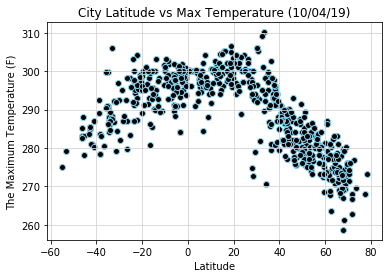

In [70]:
#Latitude Vs Temparature Plot
plt.scatter(weather_df["latitude"],weather_df["maximum_temparature"], facecolors="black", edgecolors="skyblue")
plt.title("City Latitude vs Max Temperature (10/04/19)")
plt.xlabel("Latitude")
plt.ylabel("The Maximum Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Myfirstfig.png")
plt.show()

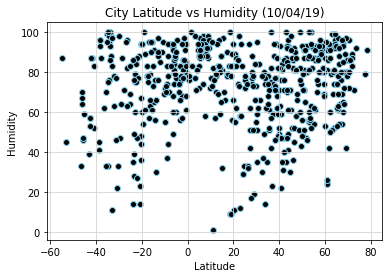

In [71]:
#Latitude Vs Humidity Plot
plt.scatter(weather_df["latitude"],weather_df["humidity"], facecolors="black", edgecolors="skyblue")
plt.title("City Latitude vs Humidity (10/04/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Mysecondfig.png")
plt.show()

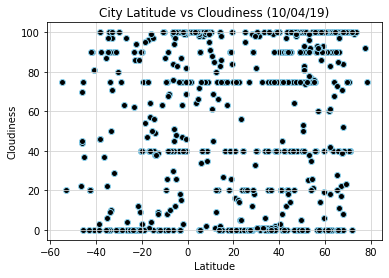

In [72]:
#Latitude vs Cloudiness plot
plt.scatter(weather_df["latitude"],weather_df["cloudiness"], facecolors="black", edgecolors="skyblue")
plt.title("City Latitude vs Cloudiness (10/04/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Mythirdfig.png")
plt.show()

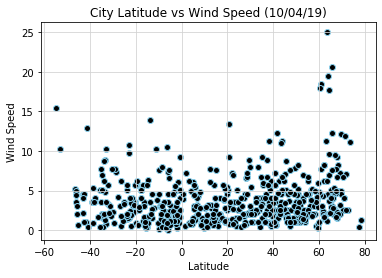

In [73]:
#Latitude vs Wind speed plot
plt.scatter(weather_df["latitude"],weather_df["wind speeds"], facecolors="black", edgecolors="skyblue")
plt.title("City Latitude vs Wind Speed (10/04/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Myfourth.png")
plt.show()